In [2]:
# run this to shorten the data import from the files
path_data = '/home/nero/Documents/Estudos/DataCamp/Python/courses/Analyzing_Financial_Statements_in_Python/datasets/'


In [3]:
# exercise 01

"""
Compute net income

One of the uses of an income statement is to determine how much profit (also called net income) the company is making. In this exercise, you will compute the net income of a company.

In this exercise, total_revenue, depreciation, and cost_of_goods_sold have already been loaded for you. You will compute the income before taxes using these items. Then, assuming a tax rate of 5%, you will compute the net income, i.e., the income after taxes.
"""

# Instructions

"""

    Compute the income before taxes.
    Assuming a tax rate of 5%, compute the net income.

"""

# solution

depreciation = 260
total_revenue = 3640
cost_of_goods_sold = 460

# Compute income before taxes
income_before_taxes = (total_revenue - cost_of_goods_sold - depreciation)

# Compute income after taxes
net_income = income_before_taxes * 0.95

print(net_income)

#----------------------------------#

# Conclusion

"""
Good work! A company's net income can be divided among the shareholders as dividends. However, it's not mandatory for a company to pay out dividends from its net income. Now on to computing and analyzing some ratios using pandas.
"""

2774.0


"\nGood work! A company's net income can be divided among the shareholders as dividends. However, it's not mandatory for a company to pay out dividends from its net income. Now on to computing and analyzing some ratios using pandas.\n"

In [16]:
import pandas as pd
income_statement = pd.read_csv(path_data + 'income_statment.csv').drop('Unnamed: 0', axis = 1)

income_statement.head()

,Year,comp_type,Cost Of Revenue,Total Operating Expenses,Total Revenue,gross_margin,operating_margin
0,2019,tech,161782000000,196244000000,260174000000,0.378178,0.245720
1,2020,tech,169559000000,208227000000,274515000000,0.382332,0.241473
2,2021,tech,212981000000,256868000000,365817000000,0.417794,0.297824
3,2022,tech,223546000000,274891000000,394328000000,0.433096,0.302887
4,2019,tech,42910000000,82884000000,125843000000,0.659020,0.341370


In [17]:
# exercise 02

"""
Computing ratios from the income statement

The gross and operating margins are commonly used to see how efficiently a company uses its assets to earn money. In this exercise, you will compute the average gross margin and operating margin by industry.

The DataFrame income_statement has already been loaded for you, and pandas have also been loaded with the alias pd.
"""

# Instructions

"""

    Print the columns of income_statement to view the columns you can use to compute the gross and operating margin.
---

    Compute the gross margin.
    Compute the operating margin.
    Use .groupby() to return the average gross margin and operating margin by industry (provided in the comp_type column).

"""

# solution

# Compute the gross margin
income_statement["gross_margin"] = (income_statement['Total Revenue']- income_statement['Cost Of Revenue'])/income_statement['Total Revenue']

# Compute the operating margin
income_statement["operating_margin"] = (income_statement['Total Revenue']- income_statement['Total Operating Expenses'])/income_statement['Total Revenue']

# Calculate mean gross margin and operating margin by industry
average_ratio = income_statement.groupby("comp_type")[["gross_margin", "operating_margin"]].mean()

print(average_ratio)

#----------------------------------#

# Conclusion

"""
Good job! We can see that the average ratio of all the industries is similar in this case. However, note that just because the industries have similar gross and operating margins, their other ratios are not necessarily similar.
"""

           gross_margin  operating_margin
comp_type                                
fmcg           0.514396          0.207112
real_est       0.534848          0.299938
tech           0.572062          0.273889


'\nGood job! We can see that the average ratio of all the industries is similar in this case. However, note that just because the industries have similar gross and operating margins, their other ratios are not necessarily similar.\n'

In [18]:
balance_sheet = pd.read_excel(path_data + 'balance_sheet.xlsx')
balance_sheet.head()

,Year,Accounts Payable,Cash,Common Stock,Gains Losses Not Affecting Retained Earnings,Inventory,Long Term Debt,Long Term Investments,Net Receivables,Net Tangible Assets,...,Total Liab,Total Stockholder Equity,comp_type,company,Deferred Long Term Asset Charges,Good Will,Intangible Assets,Capital Surplus,Minority Interest,Deferred Long Term Liab
0,2019,46236000000,48844000000,4.517400e+10,-584000000,4.106000e+09,9.180700e+10,1.053410e+11,45804000000,90488000000,...,248028000000,90488000000,tech,AAPL,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,42296000000,38016000000,5.077900e+10,-406000000,4.061000e+09,9.866700e+10,1.008870e+11,37445000000,65339000000,...,258549000000,65339000000,tech,AAPL,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,54763000000,34940000000,5.736500e+10,163000000,6.580000e+09,1.091060e+11,1.278770e+11,51506000000,63090000000,...,287912000000,63090000000,tech,AAPL,NaN,NaN,NaN,NaN,NaN,NaN
3,2022,64115000000,23646000000,6.484900e+10,-11109000000,4.946000e+09,9.895900e+10,1.208050e+11,60932000000,50672000000,...,302083000000,50672000000,tech,AAPL,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,9382000000,11356000000,7.852000e+10,-340000000,2.063000e+09,6.666200e+10,2.649000e+09,29524000000,52554000000,...,184226000000,102330000000,tech,MSFT,7.536000e+09,4.202600e+10,7.750000e+09,NaN,NaN,NaN


In [19]:
# exercise 03

"""
Updating the user-defined function

User-defined functions are a great way of reducing repetitive work. The function defined in the video is provided below:

def compute_ratio(df, numerator, denominator,
                  ratio_name):
    df[ratio_name] = df[numerator] / df[denominator]
    return df

Notice that the function we defined cannot directly compute ratios that require adding or subtracting values in the numerator and denominator, such as the operating or the gross margin ratio.

In this exercise, you will update this function so that it can be used to compute ratios that involve addition in the numerator and denominator.

You will use a pandas function called .sum(), which can sum over an axis in the DataFrame. An axis of 0 means rows, so it would sum up values over the rows and return one value for each column. An axis of 1 means columns, so it would sum up values from different columns in df and return one value for each row. You can think of df.sum(axis=1) as being equivalent to df[column_1] + ... + df[column_n]. The default axis in pd.sum() is 0.
"""

# Instructions

"""

    Update the function compute_ratio to take a list of numerator column names and sum them up so that one value is returned for each row; do the same for a list of denominator column names.
---


    Print the columns of the DataFrame balance_sheet to see if you can compute the current ratio with the given columns.
---

    Compute a column called current_ratio with the function compute_ratio using the columns provided in balance_sheet.

"""

# solution

def compute_ratio(df, numerator, denominator, ratio_name):
    df[ratio_name] = df[numerator].sum(axis=1) / df[denominator].sum(axis=1)
    return df

print(balance_sheet.columns)

# Use compute_ratio to compute the current ratio
balance_sheet = compute_ratio(balance_sheet, ["Inventory", "Short Term Investments"], ["Accounts Payable"], "current_ratio")

print(balance_sheet)

#----------------------------------#

# Conclusion

"""
Nice job! Now this function is more versatile. Note that in this exercise, we are not adding up anything in the denominator, but the function still works! This is how we can use functions from pandas to make our own function more flexible.
"""

Index(['Year', 'Accounts Payable', 'Cash', 'Common Stock',
       'Gains Losses Not Affecting Retained Earnings', 'Inventory',
       'Long Term Debt', 'Long Term Investments', 'Net Receivables',
       'Net Tangible Assets', 'Other Assets', 'Other Current Assets',
       'Other Current Liab', 'Other Liab', 'Other Stockholder Equity',
       'Property Plant Equipment', 'Retained Earnings', 'Short Long Term Debt',
       'Short Term Investments', 'Total Assets', 'Total Current Assets',
       'Total Current Liabilities', 'Total Liab', 'Total Stockholder Equity',
       'comp_type', 'company', 'Deferred Long Term Asset Charges', 'Good Will',
       'Intangible Assets', 'Capital Surplus', 'Minority Interest',
       'Deferred Long Term Liab'],
      dtype='object')
    Year  Accounts Payable         Cash  Common Stock  \
0   2019       46236000000  48844000000  4.517400e+10   
1   2020       42296000000  38016000000  5.077900e+10   
2   2021       54763000000  34940000000  5.736500e+10   

'\nNice job! Now this function is more versatile. Note that in this exercise, we are not adding up anything in the denominator, but the function still works! This is how we can use functions from pandas to make our own function more flexible.\n'

In [26]:
merged_dat = pd.read_csv(path_data + 'merged_dat.csv').drop(columns = ['Unnamed: 0'])

In [28]:
def compute_ratio(df, numerator, denominator, ratio_name, addition_in_numerator = True,
                  addition_in_denominator = True):

    if addition_in_numerator:
        ratio_numerator = df[numerator].sum(axis=1)
    else:
        ratio_numerator = df[numerator[0]] - df[numerator[1:]].sum(axis=1)

    if addition_in_denominator:
        ratio_denominator = df[denominator].sum(axis=1)
    else:
        ratio_denominator = df[denominator[0]] - df[denominator[1:]].sum(axis=1)

    df[ratio_name] = ratio_numerator/ratio_denominator

    return df


In [29]:
# exercise 04

"""
Computing ratios with user-defined function

In this exercise, you'll use the function from the last exercise to compute financial ratios. Recall that the function is:

def compute_ratio(df, numerator, denominator, ratio_name, 
                  addition_in_numerator = True,
                  addition_in_denominator = True):
  numerator_of_ratio = np.where(addition_in_numerator,
                             df[numerator].sum(axis=1), 
                             df[numerator[0]] - df[numerator[1:]].sum(
                               axis=1))
  denominator_of_ratio = np.where(addition_in_denominator, 
                               df[denominator].sum(axis=1), 
                               df[denominator[0]] - df[denominator[1:]].sum(axis=1))
  df[ratio_name] = numerator_of_ratio/denominator_of_ratio
  return df

The pandas DataFrame merged_dat is loaded for you, which you will use to compute financial ratios using the function compute_ratio.
"""

# Instructions

"""


    Print the columns of merged_dat to verify if you can compute gross margin and asset turnover ratio.
---

    Compute gross margin using the function compute_ratio.
    Compute the asset turnover ratio using the function compute_ratio.

"""

# solution

# Print the columns of merged_dat
print(merged_dat.columns)

# Compute gross margin using compute_ratio
merged_dat = compute_ratio(merged_dat, numerator=["Total Revenue", "Cost Of Revenue"], denominator=["Total Revenue"], addition_in_numerator=False, ratio_name="gross_margin")

# Compute asset turnover ratio using compute_ratio
merged_dat = compute_ratio(merged_dat, numerator=["Total Revenue"], denominator=["Total Assets"], ratio_name="asset_turnover")

print(merged_dat.head())

#----------------------------------#

# Conclusion

"""
Nice job! Notice that using this function to compute ratios is not exactly more efficient than writing out the ratio formula using simple pandas operations, which we used to do before being introduced to user-defined functions to compute ratios. In the next exercise, you will see how the function can be used to compute multiple ratios easily.
"""

Index(['Year', 'company', 'Ebit', 'Total Revenue', 'Net Income',
       'Cost Of Revenue', 'Total Operating Expenses', 'Cash', 'Total Assets',
       'Total Current Assets', 'Total Current Liabilities', 'gross_margin',
       'asset_turnover'],
      dtype='object')
   Year company          Ebit  Total Revenue   Net Income  Cost Of Revenue  \
0  2019    AAPL   63930000000   260174000000  55256000000     161782000000   
1  2020    AAPL   66288000000   274515000000  57411000000     169559000000   
2  2021    AAPL  108949000000   365817000000  94680000000     212981000000   
3  2022    AAPL  119437000000   394328000000  99803000000     223546000000   
4  2019    MSFT   42959000000   125843000000  39240000000      42910000000   

   Total Operating Expenses         Cash  Total Assets  Total Current Assets  \
0              196244000000  48844000000  338516000000          162819000000   
1              208227000000  38016000000  323888000000          143713000000   
2              256868000

'\nNice job! Notice that using this function to compute ratios is not exactly more efficient than writing out the ratio formula using simple pandas operations, which we used to do before being introduced to user-defined functions to compute ratios. In the next exercise, you will see how the function can be used to compute multiple ratios easily.\n'

In [30]:
# exercise 05

"""
Computing multiple ratios with the user-defined function

Let's have a look at the function you saw in the last two exercises.

def compute_ratio(df, numerator, denominator, ratio_name, 
                  addition_in_numerator = True,
                  addition_in_denominator = True):
  ratio_numerator = np.where(addition_in_numerator,
                             df[numerator].sum(axis=1), 
                             df[numerator[0]] - df[numerator[1:]].sum(
                               axis=1))
  ratio_denominator = np.where(addition_in_denominator, 
                               df[denominator].sum(axis=1), 
                               df[denominator[0]] - df[denominator[1:]].sum(axis=1))
  df[ratio_name] = ratio_numerator/ratio_denominator
  return df

Recall that in the previous exercise, we used the function to compute ratios. Still, it was not more efficient nor did it involve less coding to compute the ratios using this function. In this exercise, you'll see how the function can be used to compute many ratios in a loop. This will make computing multiple ratios more efficient and involve less coding.
"""

# Instructions

"""


    Let's start off by checking the columns in the DataFrame merged_dat.
---

    Have a look at the ratios and the order in which they appear in list_of_ratio_names and fill up the list_of_numerators, list_of_denominators, list_addition_in_numerator and list_addition_in_denominator accordingly.
---

    Fill in the correct function to loop over multiple lists simultaneously.

"""

# solution

# Print the columns 
print(merged_dat.columns)

list_of_ratio_names = ["asset_turnover", "gross_margin", "current_ratio"]

list_of_numerators = [["Total Revenue"],
  					  ["Total Revenue", "Cost Of Revenue"],
  					  ["Total Current Assets"]]
list_of_denominators = [["Total Assets"],
                      ["Total Revenue"],
                      ["Total Current Liabilities"]]

list_addition_in_numerator = [True, False, True]
list_addition_in_denominator = [True, True, True]

# Fill in the correct function here
for numerator, denominator, ratio_name, addition_in_numerator, addition_in_denominator in zip(list_of_numerators, list_of_denominators, list_of_ratio_names, list_addition_in_numerator, list_addition_in_denominator):
  
  merged_dat = compute_ratio(merged_dat, numerator, denominator, ratio_name, addition_in_numerator, addition_in_denominator)
  
print(merged_dat[list_of_ratio_names].head())

#----------------------------------#

# Conclusion

"""
Great job! Now you can compute multiple financial ratios more efficiently. Notice how in the last exercise, while computing asset turnover ratio, filling in the addition_in_numerator and addition_in_denominator parameters was unnecessary since their default value is True. However, we fill it in here because other ratios being computed need a value in that parameter. So in the list containing those parameters (for instance, list_addition_in_numerator = [True, False, True]), if we left one entry as empty (for instance, list_addition_in_numerator = [, False, True]), the code would not put in the default value, but break down.
"""

Index(['Year', 'company', 'Ebit', 'Total Revenue', 'Net Income',
       'Cost Of Revenue', 'Total Operating Expenses', 'Cash', 'Total Assets',
       'Total Current Assets', 'Total Current Liabilities', 'gross_margin',
       'asset_turnover'],
      dtype='object')
   asset_turnover  gross_margin  current_ratio
0        0.768572      0.378178       1.540126
1        0.847562      0.382332       1.363604
2        1.042208      0.417794       1.074553
3        1.117852      0.433096       0.879356
4        0.439157      0.659020       2.528839


'\nGreat job! Now you can compute multiple financial ratios more efficiently. Notice how in the last exercise, while computing asset turnover ratio, filling in the addition_in_numerator and addition_in_denominator parameters was unnecessary since their default value is True. However, we fill it in here because other ratios being computed need a value in that parameter. So in the list containing those parameters (for instance, list_addition_in_numerator = [True, False, True]), if we left one entry as empty (for instance, list_addition_in_numerator = [, False, True]), the code would not put in the default value, but break down.\n'

In [38]:
msft = merged_dat[merged_dat['company'] == 'MSFT']
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

/tmp/ipykernel_1071703/2922641088.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msft["asset_turnover"] = msft["Total Assets"] / msft["Total Revenue"]
/tmp/ipykernel_1071703/2922641088.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msft["gross_margin"] = (msft["Total Revenue"] - msft["Cost Of Revenue"]) / msft["Total Revenue"]


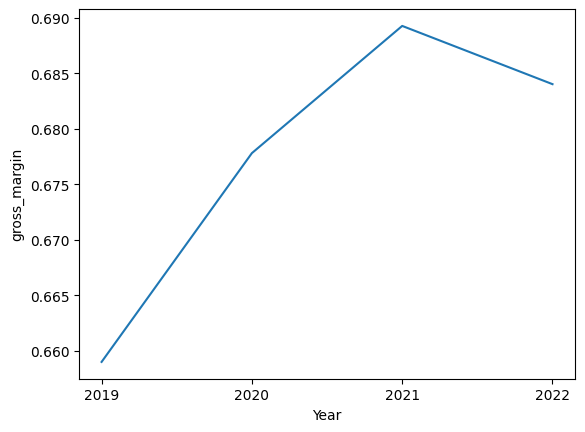

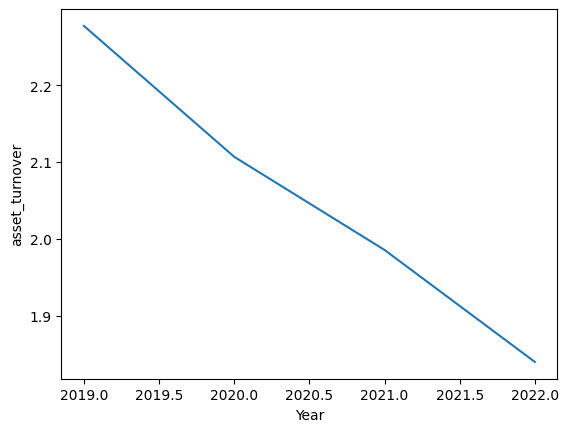

"\nNice job! Your plots look neat; however, if you want to compare the evolution of both these ratios side by side, having them in the same plot would be better. Next, you'll plot the two lines in the same plot.\n"

In [39]:
# exercise 06

"""
Plotting ratios

The gross margin ratio is an important profitability ratio that assesses a company's ability to earn profits from its sales. The asset turnover ratio is an important efficiency ratio that measures how efficiently a company is using its assets.

In this exercise, you'll plot and compute the gross margin and asset turnover ratio of Microsoft over time. This will help visually analyze the trend of these ratios for Microsoft: are these ratios constant, improving over time, volatile, or worsening? Let's find out!

Unlike using Seaborn to plot bar plots which we learned in the video, you will be using seaborn to make a line plot. Making a line plot with Seaborn only involves changing the sns.barplot to sns.lineplot. The rest of the arguments remain the same.

A DataFrame called msft has been loaded for you, along with pandas as pd and Seaborn as sns. You can run print(msft.columns) in the console to see the columns to use for this exercise.
"""

# Instructions

"""

    Compute asset turnover ratio.
    Compute gross margin ratio.
---


    Use Seaborn to plot the gross margin ratio with Year on the x-axis.
    Use Seaborn to plot the asset turnover ratio with Year on the x-axis.

"""

# solution

# Compute asset turnover ratio
msft["asset_turnover"] = msft["Total Assets"] / msft["Total Revenue"]

# Compute gross margin ratio
msft["gross_margin"] = (msft["Total Revenue"] - msft["Cost Of Revenue"]) / msft["Total Revenue"]

# Plot the gross margin ratio over time
gross_margin_plot = sns.lineplot(data= msft, x= 'Year', y = 'gross_margin')
gross_margin_plot.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()
plt.close()

# Plot the asset turnover ratio over time
asset_turnover_plot = sns.lineplot(data= msft, x= 'Year', y = 'asset_turnover')
gross_margin_plot.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()
plt.close()

#----------------------------------#

# Conclusion

"""
Nice job! Your plots look neat; however, if you want to compare the evolution of both these ratios side by side, having them in the same plot would be better. Next, you'll plot the two lines in the same plot.
"""

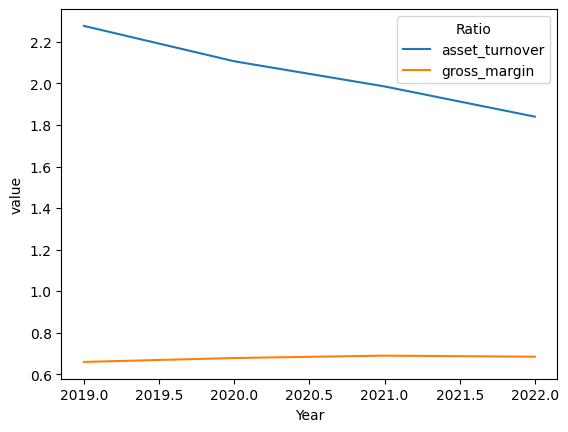

'\nWell done! The figure shows that the asset turnover ratio is relatively stable over time, whereas the gross margin ratio steadily falls post-2019. This could be caused by the fall in profits during the pandemic.\n'

In [40]:
# exercise 07

"""
Plotting ratios in one figure

In this exercise, you'll plot and compute the gross margin and asset turnover ratio of Microsoft over time. But unlike the last exercise, here you will plot it in one figure. This will help visually analyze the trend of these ratios since the ratios are plotted in the same figure.

You will use the pandas .melt() function in this exercise. In the video, the value_vars argument was specified in the function. value_vars refer to the columns we want to unpivot. However if value_vars is not specified, then all the columns which are not id_vars will be taken as value_vars.

Asset turnover and gross margin ratios have been computed for you in the msft DataFrame, provided in the "asset_turnover" and "gross_margin" columns, respectively.
"""

# Instructions

"""

    Convert the msft DataFrame from wide to long format.
    Plot the asset turnover ratio and gross margin ratio in the same plot with Year on the x-axis and add hue over the dimension of Ratio.

"""

# solution

# Convert the DataFrame from wide to long
msft_melt = msft.melt(id_vars='Year', value_vars=['asset_turnover','gross_margin'], var_name="Ratio")

# Plot the data
plot = sns.lineplot(data=msft_melt, x='Year', y='value', hue='Ratio')
plt.show()

plot.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

#----------------------------------#

# Conclusion

"""
Well done! The figure shows that the asset turnover ratio is relatively stable over time, whereas the gross margin ratio steadily falls post-2019. This could be caused by the fall in profits during the pandemic.
"""

In [ ]:
# exercise 08

"""

"""

# Instructions

"""

"""

# solution



#----------------------------------#

# Conclusion

"""

"""

'\n\n'

In [ ]:
# exercise 09

"""

"""

# Instructions

"""

"""

# solution



#----------------------------------#

# Conclusion

"""

"""

'\n\n'

In [ ]:
# exercise 10

"""

"""

# Instructions

"""

"""

# solution



#----------------------------------#

# Conclusion

"""

"""

'\n\n'

In [ ]:
# exercise 11

"""

"""

# Instructions

"""

"""

# solution



#----------------------------------#

# Conclusion

"""

"""